In [9]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [10]:
train_data = tfds.load('voc/2007', split='train', download=True)
test_data = tfds.load('voc/2007', split='test', download=True)
validation_data = tfds.load('voc/2007', split='validation', download=True)

In [11]:
# print all the keys inside one of the entries in `train_data`
print(next(iter(train_data)).keys())

dict_keys(['image', 'image/filename', 'labels', 'labels_no_difficult', 'objects'])


In [12]:
print(next(iter(train_data))['objects'].keys())

dict_keys(['bbox', 'is_difficult', 'is_truncated', 'label', 'pose'])


In [13]:
a,b,c,d = next(iter(train_data))['objects']['bbox'][0]
print(a,b,c,d)

tf.Tensor(0.14375, shape=(), dtype=float32) tf.Tensor(0.043701798, shape=(), dtype=float32) tf.Tensor(0.97083336, shape=(), dtype=float32) tf.Tensor(0.7763496, shape=(), dtype=float32)


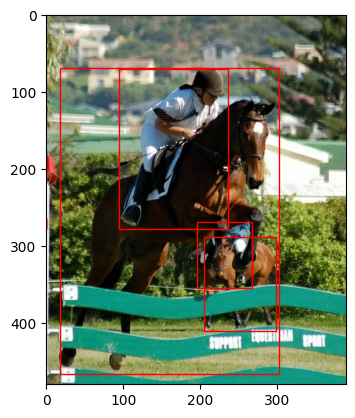

In [14]:
image = next(iter(train_data))
labels = image['objects']['bbox']
plt.imshow(image['image'])
ax = plt.gca()

height, width, _ = image['image'].shape

# Add bounding boxes from image['objects']['bbox']
for box in labels:
    ymin, xmin, ymax, xmax = box
    xmin *= width
    xmax *= width
    ymin *= height
    ymax *= height
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

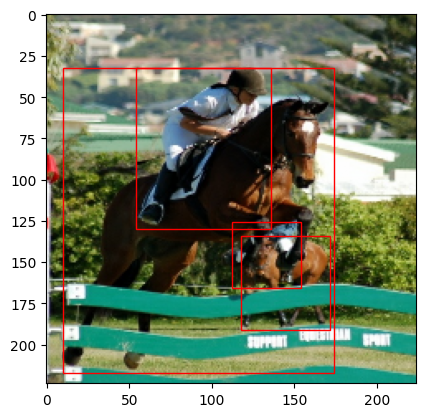

In [17]:
import tensorflow as tf
image = next(iter(train_data))
# Resize the image to (224, 224) without affecting the aspect ratio as well as the color
image['image'] = tf.image.resize(image['image'], (224, 224))
# Normalize the image
image['image'] = image['image'] / 255.0
# Convert the image to a tensor
image['image'] = tf.convert_to_tensor(image['image'])
labels = image['objects']['bbox']
plt.imshow(image['image'])
ax = plt.gca()

height, width, _ = image['image'].shape

# Add bounding boxes from image['objects']['bbox']
for box in labels:
    ymin, xmin, ymax, xmax = box
    xmin *= width
    xmax *= width
    ymin *= height
    ymax *= height
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

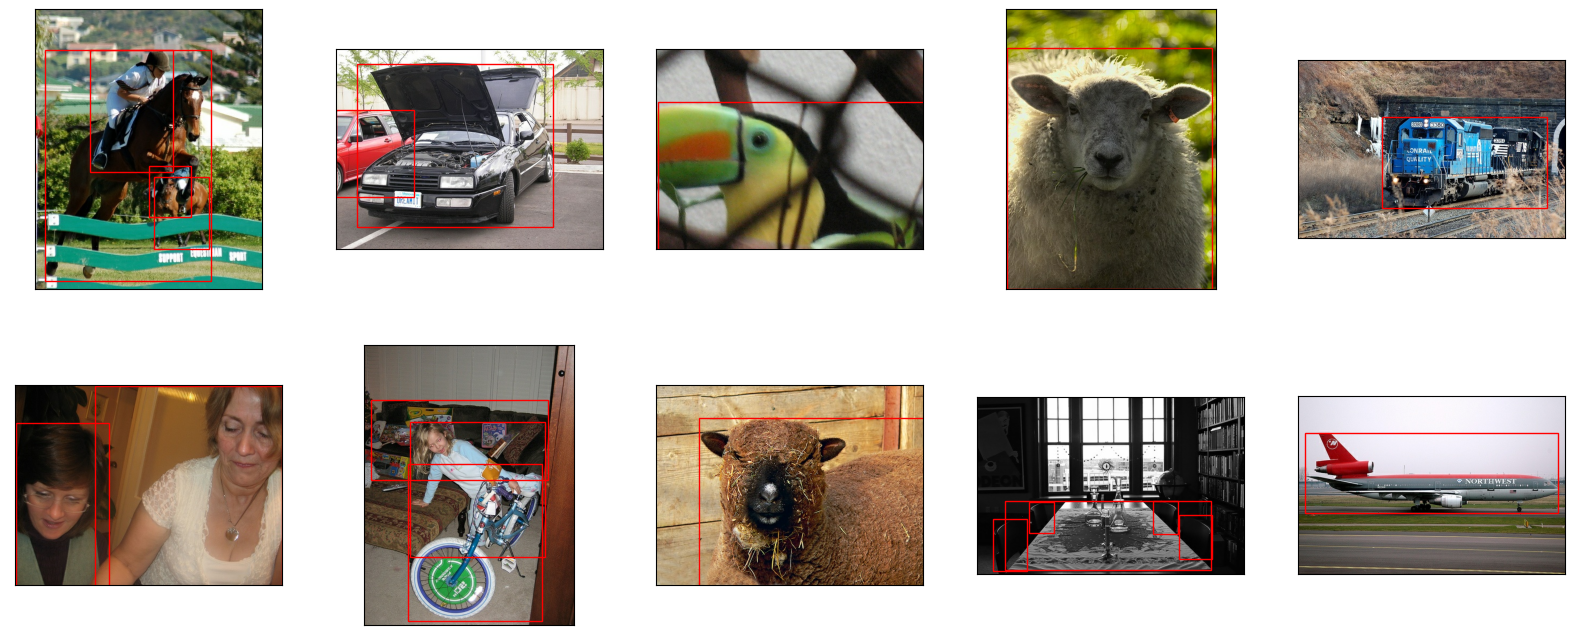

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i, image in enumerate(train_data.take(10)):
    labels = image['objects']['bbox']
    ax[i // 5, i % 5].imshow(image['image'])
    ax[i // 5, i % 5].axes.get_xaxis().set_visible(False)
    ax[i // 5, i % 5].axes.get_yaxis().set_visible(False)
    height, width, _ = image['image'].shape
    for box in labels:
        ymin, xmin, ymax, xmax = box
        xmin *= width
        xmax *= width
        ymin *= height
        ymax *= height
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax[i // 5, i % 5].add_patch(rect)

plt.show()